In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import math

In [2]:
from joblib import dump, load
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem import Descriptors
from rdkit.Contrib.SA_Score import sascorer
from rdkit import DataStructs
fpgen = AllChem.GetRDKitFPGenerator()

In [3]:
df = pd.read_csv("Информация о связывании медицинского радионуклида различными молекулами.csv")

In [4]:
df

,id,smiles,lgK
0,0,CC(C)(O)C(=O)O,3.41
1,1,CCC(O)(CC)C(=O)O,3.25
2,2,O=C(O)C1(O)CCCC1,3.22
3,3,O=C(O)C1(O)CCCCC1,2.78
4,4,O=C(O)C(O)c1ccccc1,2.82
...,...,...,...
242,244,O=C(O)c1cccc([N+](=O)[O-])c1,1.64
243,245,CCC(O)C(=O)O,3.13
244,246,CCCC(O)C(=O)O,2.76
245,247,CC(C)C(O)C(=O)O,2.99


In [5]:
df['len_smile'] = df['smiles'].apply(lambda x: len(x))

In [6]:
df

,id,smiles,lgK,len_smile
0,0,CC(C)(O)C(=O)O,3.41,14
1,1,CCC(O)(CC)C(=O)O,3.25,16
2,2,O=C(O)C1(O)CCCC1,3.22,16
3,3,O=C(O)C1(O)CCCCC1,2.78,17
4,4,O=C(O)C(O)c1ccccc1,2.82,18
...,...,...,...,...
242,244,O=C(O)c1cccc([N+](=O)[O-])c1,1.64,28
243,245,CCC(O)C(=O)O,3.13,12
244,246,CCCC(O)C(=O)O,2.76,13
245,247,CC(C)C(O)C(=O)O,2.99,15


In [22]:
for i in df.columns:
    print(f'''{i}: corr={df["lgK"].corr(df[i])} covariance={statistics.covariance(df["lgK"], df[i])}''')

id: corr=0.2770470193867295 covariance=122.8164403739179
lgK: corr=1.0 covariance=37.7148186194332
len_smile: corr=0.578716172441727 covariance=59.61932370560548
num_of_atoms: corr=0.6109273320784381 covariance=35.62030033573615
num_of_heavy_atoms: corr=0.6109273320784381 covariance=35.62030033573615
tpsa: corr=0.6795551281861703 covariance=231.27736741993348
mol_w: corr=0.6307126368858378 covariance=536.2258598166833
num_valence_electrons: corr=0.6452797433598034 covariance=207.60173931075343
num_heteroatoms: corr=0.7228421630866813 covariance=18.68233532470952
num_rings: corr=0.03951484510951975 covariance=0.24925828642901818
Fp_Density_Morgan1: corr=-0.6044851244721211 covariance=-1.5082912211520747
Fp_Density_Morgan2: corr=-0.5936620670001707 covariance=-1.776312197958793
Fp_Density_Morgan3: corr=-0.5181797345391448 covariance=-1.717779338374736
num_of_C_atoms: corr=0.4160729892012608 covariance=16.937965011026627
num_of_O_atoms: corr=0.62752815889517 covariance=11.026804219742603


In [7]:
df["lgK"].corr(df["len_smile"])

0.578716172441727

In [8]:
import statistics

In [9]:
statistics.covariance(df["lgK"], df["len_smile"])

59.61932370560548

In [10]:
def ecfc_molstring(molecule, radius=3, size=4096):
    arr = np.zeros((1,), dtype=int)
    DataStructs.ConvertToNumpyArray(
        AllChem.GetHashedMorganFingerprint(molecule, radius, size, useFeatures=False),
        arr,
    )
    return arr

def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

def prepare_data(df):
    df['mol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x))
    df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())
    df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())
    df['tpsa'] = df['mol'].apply(lambda x: Descriptors.TPSA(x))
    df['mol_w'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
    df['num_valence_electrons'] = df['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
    df['num_heteroatoms'] = df['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))
    df['num_rings'] = df['mol'].apply(lambda x: Descriptors.RingCount(x))
    df['Fp_Density_Morgan1'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan1(x))
    df['Fp_Density_Morgan2'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan2(x))
    df['Fp_Density_Morgan3'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan3(x))
    symbols = ["C", "O", "N", "P", "S"]
    number_of_atoms(symbols, df)
    # features_test = pd.DataFrame(np.array([ecfc_molstring(m) for m in df['mol']]), index=None)
    # features_test.columns = features_test.columns.astype(str)
    # df = pd.concat((df, features_test), axis=1)
    return df

In [11]:
df = prepare_data(df)

In [12]:
df

,id,smiles,lgK,len_smile,mol,num_of_atoms,num_of_heavy_atoms,tpsa,mol_w,num_valence_electrons,num_heteroatoms,num_rings,Fp_Density_Morgan1,Fp_Density_Morgan2,Fp_Density_Morgan3,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_P_atoms,num_of_S_atoms
0,0,CC(C)(O)C(=O)O,3.41,14,<rdkit.Chem.rdchem.Mol object at 0x000002B0337...,7,7,57.53,104.047344,42,3,0,1.571429,1.714286,1.714286,4,3,0,0,0
1,1,CCC(O)(CC)C(=O)O,3.25,16,<rdkit.Chem.rdchem.Mol object at 0x000002B0337...,9,9,57.53,132.078644,54,3,0,1.444444,1.777778,1.777778,6,3,0,0,0
2,2,O=C(O)C1(O)CCCC1,3.22,16,<rdkit.Chem.rdchem.Mol object at 0x000002B0337...,9,9,57.53,130.062994,52,3,1,1.333333,1.777778,2.000000,6,3,0,0,0
3,3,O=C(O)C1(O)CCCCC1,2.78,17,<rdkit.Chem.rdchem.Mol object at 0x000002B0337...,10,10,57.53,144.078644,58,3,1,1.200000,1.700000,2.000000,7,3,0,0,0
4,4,O=C(O)C(O)c1ccccc1,2.82,18,<rdkit.Chem.rdchem.Mol object at 0x000002B0337...,11,11,57.53,152.047344,58,3,1,1.272727,1.818182,2.272727,8,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,244,O=C(O)c1cccc([N+](=O)[O-])c1,1.64,28,<rdkit.Chem.rdchem.Mol object at 0x000002B0358...,12,12,80.44,167.021858,62,5,1,1.500000,2.166667,2.666667,7,4,1,0,0
243,245,CCC(O)C(=O)O,3.13,12,<rdkit.Chem.rdchem.Mol object at 0x000002B0358...,7,7,57.53,104.047344,42,3,0,1.857143,2.285714,2.285714,4,3,0,0,0
244,246,CCCC(O)C(=O)O,2.76,13,<rdkit.Chem.rdchem.Mol object at 0x000002B0358...,8,8,57.53,118.062994,48,3,0,1.750000,2.250000,2.375000,5,3,0,0,0
245,247,CC(C)C(O)C(=O)O,2.99,15,<rdkit.Chem.rdchem.Mol object at 0x000002B0358...,8,8,57.53,118.062994,48,3,0,1.500000,1.875000,1.875000,5,3,0,0,0


In [13]:
df = df.drop(columns=['smiles', 'mol'])

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt

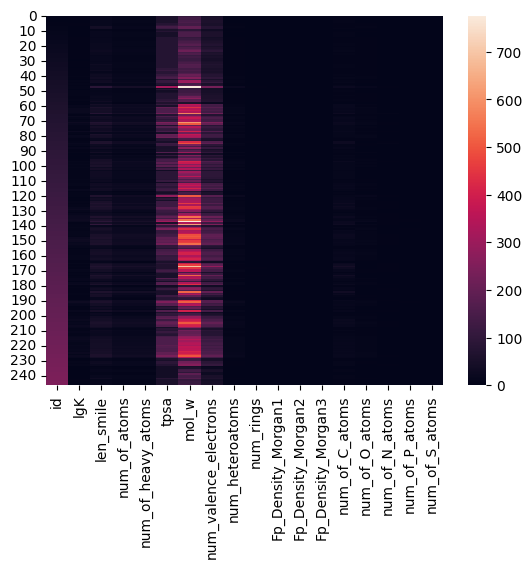

In [16]:
sn.heatmap(df, annot=False)
plt.show()